In [1]:
# from RTINS import *
from INSV2 import *
from Init_det_glrt import Init_det_glrt
from func_loaddataset import func_loaddataset
from utils import *

### TEST code

In [2]:
u = func_loaddataset('./data_inert.txt')

In [3]:
simdata = Init_det_glrt()
# Variables for calculating the performance
D = len(simdata['data_sets'])
Jadapt = 0
Jadapt_all = np.zeros((D, 3))
gamma_vec = np.logspace(4, 6, 20)
M = len(gamma_vec)
ctr = 1
Niter = M
Jfixed = np.zeros(M)
Jfixed_all = np.zeros((M, D, 3))

adtp_flag = True
ins = INS(simdata, False)

In [4]:
# whole data processing
adtp_flag = True
ins = INS(simdata)
zupt1 , logL1 = ins.detector_adaptive(u)
x_h1, cov1, quat1, P1, dT1, lst_zupt = ins.baseline(u, zupt1, logL1, adtp_flag)

None


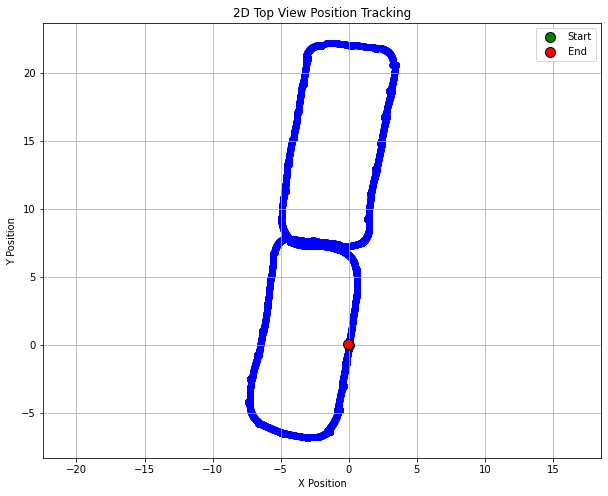

In [5]:
plot_position_tracking(x_h1)

### Batch part

In [6]:
# batch processing
init_x = None
init_quat = None
init_P = None
init_dT = 0
temp_5zupt = None
n = 500
num_batches = len(u[0]) // n
xhs = None

for i in range(num_batches + 1):
    # print(f'batch #{i+1}')
    ui = u[:, i*n: (i+1)*n]
    zupti , logLi = ins.detector_adaptive(ui)
    # zupti , logLi = zupt[:, i*n: (i+1)*n] , logL[:, i*n: (i+1)*n]
    x_h, _, quat, P, dt, ls_zupt = ins.baseline(ui, zupti, logLi, True, 
                                       init_x, init_quat, init_P, init_dT, temp_5zupt)
    if xhs is None:
        xhs = x_h
    else:
        xhs = np.hstack((xhs, x_h))
    init_x = x_h[:, -1]
    init_quat = quat
    init_P = P
    init_dT = dt
    temp_5zupt = ls_zupt

    # plot_position_tracking(xhs)


None
[[False False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  

ValueError: could not broadcast input array from shape (505,) into shape (5,)

In [ ]:
xhs.shape , x_h1.shape

((9, 11900), (9, 11900))

In [ ]:
xhs[:3, 500], x_h1[:3, 500]

(array([ 6.65349778e-05, -1.55904639e-05,  4.12639524e-04]),
 array([ 8.00297070e-05, -1.47920425e-05,  3.99692433e-04]))

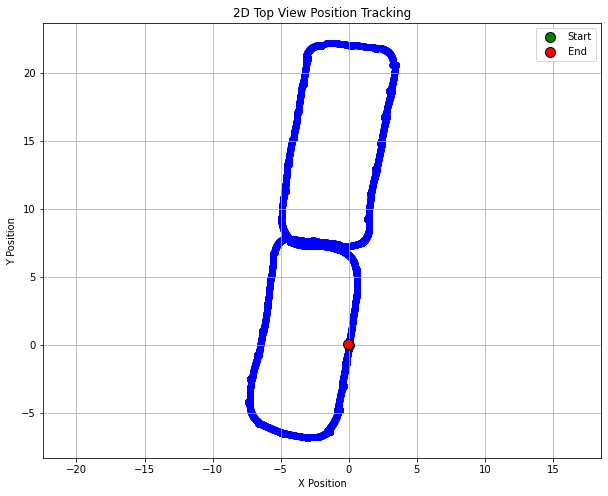

In [ ]:
plot_position_tracking(xhs)

In [ ]:
# Extracting x and y positions (assuming they are the first two components of the state vector)
x_original = x_h1[0, :]  # x positions
y_original = x_h1[1, :]  # y positions
x_batch = xhs[0, :]  # x positions
y_batch = xhs[1, :]  # y positions

# Comparing the results
def calculate_accuracy(original, batch):
    mse = np.mean((original - batch) ** 2)
    mae = np.mean(np.abs(original - batch))
    return mse, mae

# Calculate accuracy for x and y positions
mse_x, mae_x = calculate_accuracy(x_original, x_batch)
mse_y, mae_y = calculate_accuracy(y_original, y_batch)

print(f"Mean Squared Error (MSE) for x: {mse_x}")
print(f"Mean Absolute Error (MAE) for x: {mae_x}")
print(f"Mean Squared Error (MSE) for y: {mse_y}")
print(f"Mean Absolute Error (MAE) for y: {mae_y}")



Mean Squared Error (MSE) for x: 2.0355657698811907e-12
Mean Absolute Error (MAE) for x: 1.2072176157942574e-06
Mean Squared Error (MSE) for y: 1.3198801696905887e-12
Mean Absolute Error (MAE) for y: 1.1242877631755388e-06


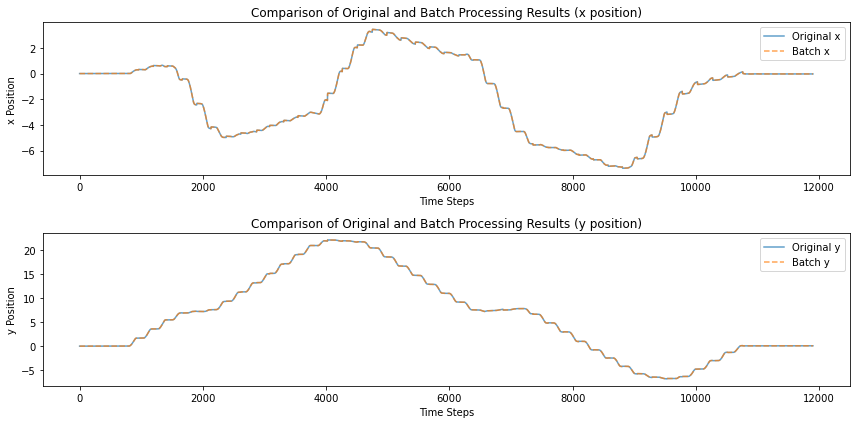

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(x_original, label='Original x', alpha=0.7)
plt.plot(x_batch, label='Batch x', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Comparison of Original and Batch Processing Results (x position)')
plt.xlabel('Time Steps')
plt.ylabel('x Position')

plt.subplot(2, 1, 2)
plt.plot(y_original, label='Original y', alpha=0.7)
plt.plot(y_batch, label='Batch y', linestyle='dashed', alpha=0.7)
plt.legend()
plt.title('Comparison of Original and Batch Processing Results (y position)')
plt.xlabel('Time Steps')
plt.ylabel('y Position')

plt.tight_layout()
plt.show()

### Batch with detector outside of loop

In [ ]:
# batch processing
init_x = None
init_quat = None
init_P = None
init_dT = 0
n = 500
num_batches = len(u[0]) // n
xhs = None

for i in range(num_batches + 1):
    # print(f'batch #{i+1}')
    ui = u[:, i*n: (i+1)*n]
    # zupti , logLi = ins.detector_adaptive(ui)
    zupti , logLi = zupt1[:, i*n: (i+1)*n] , logL1[:, i*n: (i+1)*n]
    x_h, _, quat, P, dt = ins.baseline(ui, zupti, logLi, True, 
                                       init_x, init_quat, init_P, init_dT)
    if xhs is None:
        xhs = x_h
    else:
        xhs = np.hstack((xhs, x_h))
    init_x = x_h[:, -1]
    init_quat = quat
    init_P = P
    init_dT = dt


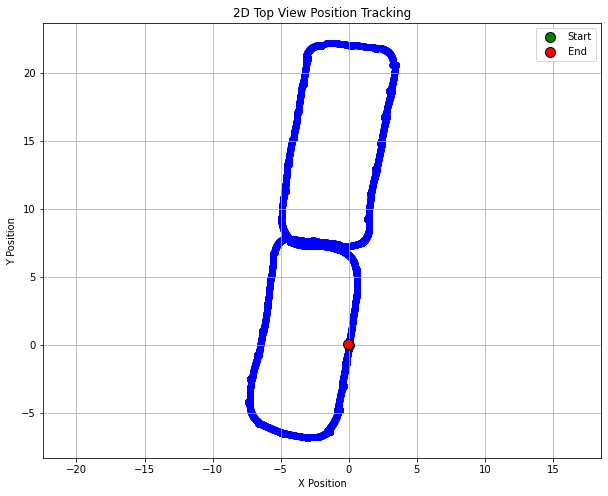

In [ ]:
plot_position_tracking(xhs)

In [ ]:
# break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# batch processing
init_x = None
init_quat = None
init_P = None
n = 500
num_batches = len(u[0]) // n
xhs = None

for i in range(num_batches + 1):
    # print(f'batch #{i+1}')
    ui = u[:, i*n: (i+1)*n]
    # zupti , logLi = ins.detector_adaptive(ui)
    zupti , logLi = zupt1[:, i*n: (i+1)*n] , logL1[:, i*n: (i+1)*n]
    x_h, _, quat, P = ins.baseline(ui, zupti, logLi, True, init_x, init_quat, init_P)
    if xhs is None:
        xhs = x_h
    else:
        xhs = np.hstack((xhs, x_h))
    init_x = x_h[:, -1]
    init_quat = quat
    init_P = P

    plot_position_tracking(xhs)

In [ ]:
Ns = 4000 + 20
xhs[:3, Ns] , x_h1[:3, Ns]

In [ ]:
Ns = 4000 + 21
xhs[:3, Ns] , x_h1[:3, Ns]

In [ ]:
# batch processing
init_x = None
init_quat = None
init_P = None
n = 4000
num_batches = len(u[0]) // n
xhs = None
N_check = 2
ni = 0
# for i in range(num_batches + 1):
i = 0
    # print(f'batch #{i+1}')
ui = u[:, i*n: (i+1)*n]
zupti , logLi = ins.detector_adaptive(ui)
# zupti , logLi = zupt[:, i*n: (i+1)*n] , logL[:, i*n: (i+1)*n]
x_h, _, quat, P = ins.baseline(ui, zupti, logLi, True, init_x, init_quat, init_P)
if xhs is None:
    xhs = x_h
else:
    xhs = np.hstack((xhs, x_h))
init_x = x_h[:, -1]
init_quat = quat
init_P = P

i = 1
    # print(f'batch #{i+1}')
ui = u[:, i*n: (i*n) + 22]
# ui = u[:, i*n: (i+1)*n]
zupti , logLi = ins.detector_adaptive(ui)
# zupti , logLi = zupt[:, i*n: (i+1)*n] , logL[:, i*n: (i+1)*n]
x_h, _, quat, P = ins.baseline(ui, zupti, logLi, True, init_x, init_quat, init_P)
if xhs is None:
    xhs = x_h
else:
    xhs = np.hstack((xhs, x_h))
init_x = x_h[:, -1]
init_quat = quat
init_P = P

In [ ]:
f"Ns 21 -> 22 got proble,"